In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
dataset = pd.read_csv('drive/My Drive/Machine Learning A_to_Z/Classification/Social_Network_Ads.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
X = dataset.iloc[:,[0,1]].values
y = dataset.iloc[:,2].values

# splitting dataset into training set and test set

In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=0)

#feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X)

# fitting classifier to training set

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5 , metric = 'minkowski' , p=2)
classifier.fit(X_train , y_train)

KNeighborsClassifier()

# predicting test results

In [12]:
y_pred  = classifier.predict(X_train)


# making confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train , y_pred)
cm

array([[172,  17],
       [ 10, 101]])

# visualising training set results

<ipython-input-14-aa576882d394>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0] , X_set[y_set==j,1] , c=ListedColormap(('red','green'))(i),label=j)


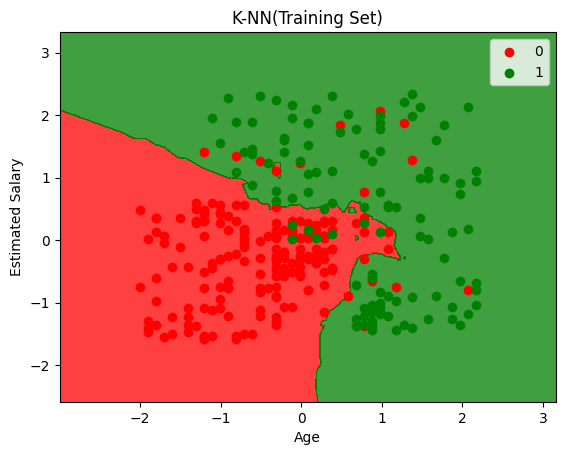

In [14]:
from matplotlib.colors import ListedColormap

X_set , y_set = X_train , y_train

X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1 , stop = X_set[:,0].max()+1  , step=0.01) ,
                      np.arange(start = X_set[:,1].min()-1 , stop = X_set[:,1].max()+1  , step=0.01))

plt.contourf(X1 , X2 , classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape) , alpha=0.75 , cmap= ListedColormap(('red','green')))

plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min() , X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0] , X_set[y_set==j,1] , c=ListedColormap(('red','green'))(i),label=j)

plt.title('K-NN(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



# visualising test set results

IndexError: ignored

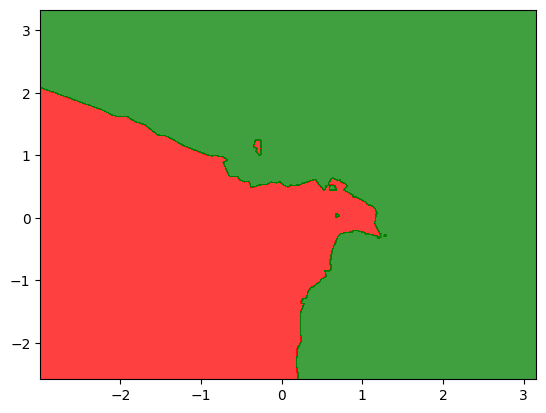

In [15]:
from matplotlib.colors import ListedColormap

X_set , y_set = X_test , y_test

X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1 , stop = X_set[:,0].max()+1  , step=0.01) ,
                      np.arange(start = X_set[:,1].min()-1 , stop = X_set[:,1].max()+1  , step=0.01))

plt.contourf(X1 , X2 , classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape) , alpha=0.75 , cmap= ListedColormap(('red','green')))

plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min() , X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0] , X_set[y_set==j,1] , c=ListedColormap(('red','green'))(i),label=j)

plt.title('k-NN (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

